In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import matplotlib

In [2]:
digits = datasets.load_digits()

In [3]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [4]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

In [5]:
x = digits.data
y = digits.target
print(x.shape)
print(y.shape)

(1797, 64)
(1797,)


In [6]:
# 取出一个样本看看
some_digits = x[666]
print(some_digits)

[ 0.  0.  5. 15. 14.  3.  0.  0.  0.  0. 13. 15.  9. 15.  2.  0.  0.  4.
 16. 12.  0. 10.  6.  0.  0.  8. 16.  9.  0.  8. 10.  0.  0.  7. 15.  5.
  0. 12. 11.  0.  0.  7. 13.  0.  5. 16.  6.  0.  0.  0. 16. 12. 15. 13.
  1.  0.  0.  0.  6. 16. 12.  2.  0.  0.]


In [7]:
y[666]

0

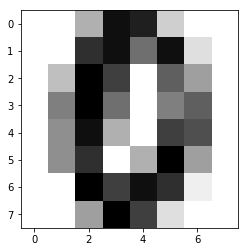

In [8]:
some_digit_image = some_digits.reshape(8, 8)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=666)  # random_state=666就是随机种子

In [11]:
from sklearn.neighbors import KNeighborsClassifier
kNN_classifier = KNeighborsClassifier(n_neighbors=3)
kNN_classifier.fit(X_train, y_train)
y_predict = kNN_classifier.predict(X_test)
y_predict

array([8, 1, 3, 4, 4, 0, 7, 0, 8, 0, 4, 6, 1, 1, 2, 0, 1, 6, 7, 3, 3, 6,
       3, 2, 3, 4, 0, 2, 0, 3, 0, 8, 7, 2, 3, 5, 1, 3, 1, 5, 8, 6, 2, 6,
       3, 1, 3, 0, 0, 4, 9, 9, 2, 8, 7, 0, 5, 4, 0, 9, 5, 5, 5, 7, 4, 2,
       8, 8, 7, 1, 4, 3, 0, 2, 7, 2, 1, 2, 4, 0, 9, 0, 6, 6, 2, 0, 0, 5,
       4, 4, 3, 1, 3, 8, 6, 4, 4, 7, 5, 6, 8, 4, 8, 4, 6, 9, 7, 7, 0, 8,
       8, 3, 9, 7, 1, 8, 4, 2, 7, 0, 0, 4, 9, 6, 7, 3, 4, 6, 4, 8, 4, 7,
       2, 6, 9, 5, 8, 7, 2, 5, 5, 9, 7, 9, 3, 1, 9, 4, 4, 1, 5, 1, 6, 4,
       4, 8, 1, 6, 2, 5, 2, 1, 4, 4, 3, 9, 4, 0, 6, 0, 8, 3, 8, 7, 3, 0,
       3, 0, 5, 9, 2, 7, 1, 8, 1, 4, 3, 3, 7, 8, 2, 7, 2, 2, 8, 0, 5, 7,
       6, 7, 3, 4, 7, 1, 7, 0, 9, 2, 8, 9, 3, 8, 9, 1, 1, 1, 9, 8, 8, 0,
       3, 7, 3, 3, 4, 8, 2, 1, 8, 6, 0, 1, 7, 7, 5, 8, 3, 8, 7, 6, 8, 4,
       2, 6, 2, 3, 7, 4, 9, 3, 5, 0, 6, 3, 8, 3, 3, 1, 4, 5, 3, 2, 5, 6,
       9, 6, 9, 5, 5, 3, 6, 5, 9, 3, 7, 7, 0, 2, 4, 9, 9, 9, 2, 5, 6, 1,
       9, 6, 9, 7, 7, 4, 5, 0, 0, 5, 3, 8, 4, 4, 3,

In [12]:
sum(y_predict == y_test)

356

In [13]:
sum(y_predict == y_test)/len(y_test)

0.9888888888888889

# 超参数：在算法运行前需要确定的参数

## 寻找最好的K

In [14]:
best_score = 0.0
best_k = -1
for k in range(1, 11):
    kNN_classifier = KNeighborsClassifier(n_neighbors=k)
    kNN_classifier.fit(X_train, y_train)
    y_predict = kNN_classifier.predict(X_test)
    score = sum(y_predict == y_test)/len(y_test)
    if score > best_score:
        best_k = k
        best_score = score
        
print("best_k = ", best_k)
print("best_score = ", best_score)

best_k =  4
best_score =  0.9916666666666667


## 对于KNN要不要考虑距离对其影响

In [15]:
best_method = " "
best_score = 0.0
best_k = -1
# sklearn中的KNN算法提供了考虑距离权重和不考虑距离权重两种方法
for method in ["uniform",  "distance"]:
    for k in range(1, 11):
        kNN_classifier = KNeighborsClassifier(n_neighbors=k, weights=method)
        kNN_classifier.fit(X_train, y_train)
        y_predict = kNN_classifier.predict(X_test)
        score = sum(y_predict == y_test)/len(y_test)
        if score > best_score:
            best_k = k
            best_score = score
            best_method = method

print("best_method = ", method)
print("best_k = ", best_k)
print("best_score = ", best_score)

best_method =  distance
best_k =  4
best_score =  0.9916666666666667


## 搜索明科夫斯基距离相应的p

In [16]:
%%time
best_p = -1
best_score = 0.0
best_k = -1
# 在考虑距离权重的时候，采用什么样的距离公式也对其有影响，p=1曼哈顿距离，p=2欧拉距离
for k in range(1, 11):
    for p in range(1, 6):
        kNN_classifier = KNeighborsClassifier(n_neighbors=k, weights="distance", p=p)
        kNN_classifier.fit(X_train, y_train)
        y_predict = kNN_classifier.predict(X_test)
        score = sum(y_predict == y_test)/len(y_test)
        if score > best_score:
            best_k = k
            best_score = score
            best_p = p

print("best_p = ", best_p)
print("best_k = ", best_k)
print("best_score = ", best_score)

best_p =  2
best_k =  3
best_score =  0.9888888888888889
Wall time: 22.1 s


## 网格搜索（Grid Search）

In [17]:
# 在寻找最好的超参数的时候往往用到网格搜索，就是上面的几个for循环
param_grid = [
    {
        "weights" : ["uniform"],
        "n_neighbors" : [i for i in range(1, 11)]
    },
    {
        "weights" : ["distance"],
        "n_neighbors" : [i for i in range(1, 11)],
        "p" : [i for i in range(1, 6)]
    }
]

In [18]:
knn_clf = KNeighborsClassifier()

In [19]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(knn_clf, param_grid,cv=2)  # cv=2表示交叉验证2次

In [20]:
%%time
grid_search.fit(X_train, y_train)

Wall time: 1min 29s


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'weights': ['uniform'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}, {'weights': ['distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [21]:
# 网格搜索下的最好的超参数结果
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=5,
           weights='distance')

In [22]:
# 在最佳超参数的情况下的模型准确度
grid_search.best_score_

0.9812108559498957

In [23]:
grid_search.best_params_

{'n_neighbors': 3, 'p': 5, 'weights': 'distance'}

In [24]:
knn_clf = grid_search.best_estimator_

In [25]:
knn_clf.predict(X_test)

array([8, 1, 3, 4, 4, 0, 7, 0, 8, 0, 4, 6, 1, 1, 2, 0, 1, 6, 7, 3, 3, 6,
       5, 2, 9, 4, 0, 2, 0, 3, 0, 8, 7, 2, 3, 5, 1, 3, 1, 5, 8, 6, 2, 6,
       3, 1, 3, 0, 0, 4, 9, 9, 2, 8, 7, 0, 5, 4, 0, 9, 5, 5, 8, 7, 4, 2,
       8, 8, 7, 5, 4, 3, 0, 2, 7, 2, 1, 2, 4, 0, 9, 0, 6, 6, 2, 0, 0, 5,
       4, 4, 3, 1, 3, 8, 6, 4, 4, 7, 5, 6, 8, 4, 8, 4, 6, 9, 7, 7, 0, 8,
       8, 3, 9, 7, 1, 8, 4, 2, 7, 0, 0, 4, 9, 6, 7, 3, 4, 6, 4, 8, 4, 7,
       2, 6, 9, 5, 8, 7, 2, 5, 5, 9, 7, 9, 3, 1, 9, 4, 4, 1, 5, 1, 6, 4,
       4, 8, 1, 6, 2, 5, 2, 1, 4, 4, 3, 9, 4, 0, 6, 0, 8, 3, 8, 7, 3, 0,
       3, 0, 5, 9, 2, 7, 1, 8, 1, 4, 3, 3, 7, 8, 2, 7, 2, 2, 8, 0, 5, 7,
       6, 7, 3, 4, 7, 1, 7, 0, 9, 2, 8, 9, 3, 8, 9, 1, 1, 1, 9, 8, 8, 0,
       3, 7, 3, 3, 4, 8, 2, 1, 8, 6, 0, 1, 7, 7, 5, 8, 3, 8, 7, 6, 8, 4,
       2, 6, 2, 3, 7, 4, 9, 3, 5, 0, 6, 3, 8, 3, 3, 1, 4, 5, 3, 2, 5, 6,
       9, 6, 9, 5, 5, 3, 6, 5, 9, 3, 7, 7, 0, 2, 4, 9, 9, 9, 2, 5, 6, 1,
       9, 6, 9, 7, 7, 4, 5, 0, 0, 5, 3, 8, 4, 4, 3,

In [27]:
%%time
# n_jobs表示计算机有几个核运行，默认单核，n_jobs=-1表示所有核都用上；verbose表示在运行时输出一些信息，数字越大，输出信息越全
grid_search = GridSearchCV(knn_clf, param_grid, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

c:\users\dingwenxiang\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   47.3s


Wall time: 58.7 s


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   58.5s finished
